In [15]:
#!pip install matplotlib==3.5.0

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'
save_path = dir_path

MOGP DFs

In [17]:
# LAST GEN
path_mogp_pr10 = dir_path + 'co3_globalRecall_evaluation_stats_last_gen.csv'
df_mogp_p10 = pd.read_csv(path_mogp_pr10)

df_mogp_p10

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0,0.823,25,0.085378,0.789532,0.856468


In [18]:
# 1st gen
path_mogp_pr10_1st = dir_path + 'co3_globalRecall_evaluation_stats_gen_1.csv'
df_mogp_p10_1st = pd.read_csv(path_mogp_pr10_1st)

df_mogp_p10_1st

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0,0.738476,25,0.113376,0.694032,0.782919


MOEIR DFs

In [19]:
# last gen
path_moeir_pr10 = dir_path + 'moeir_globalRecall_evaluation_stats_last_gen.csv'
df_moeir_p10 = pd.read_csv(path_moeir_pr10)

df_moeir_p10

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_prec,ci95_hi_prec
0,0,0.413475,25.0,0.13582,0.360233,0.466716


In [20]:
# last gen
path_moeir_p10_1st = dir_path + 'moeir_globalRecall_evaluation_stats_gen_1.csv'
df_moeir_p10_1st = pd.read_csv(path_moeir_p10_1st)

df_moeir_p10_1st

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_prec,ci95_hi_prec
0,0,0.501027,25.0,0.172936,0.433237,0.568818


0.7384756749268562
[(0.04444330278263241, 0.06779078511071754), (0.033468031820055685, 0.05324156068029269)]
atr  1st Gen  measurem  (0.7384756749268562, 0.501027468584199)
atr  Last Gen  measurem  (0.8229995822836639, 0.4134746789124242)


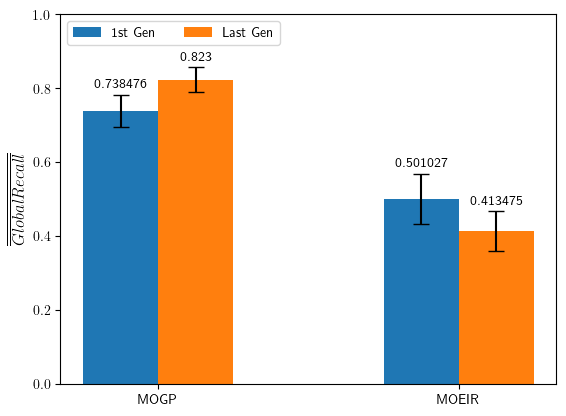

In [21]:
def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)





species = ("MOGP", "MOEIR" )
print(df_mogp_p10_1st['mean_gr'][0])
penguin_means = {
    '1st Gen': (df_mogp_p10_1st['mean_gr'][0], df_moeir_p10_1st['mean_gr'][0]),
    'Last Gen': (df_mogp_p10['mean_gr'][0], df_moeir_p10['mean_gr'][0]),
}


std = [(IC_95(df_mogp_p10_1st['std_gr'][0],df_mogp_p10_1st['count_gr'][0]), IC_95(df_moeir_p10_1st['std_gr'][0], df_moeir_p10_1st['count_gr'][0] )),
       (IC_95(df_mogp_p10['std_gr'][0], df_mogp_p10['count_gr'][0]), IC_95(df_moeir_p10['std_gr'][0], df_moeir_p10['count_gr'][0] )) ]
print(std)
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    print("atr ", attribute," measurem ", measurement)    
    offset = width * multiplier
    #axs.bar('mogp', t['mean_gr'], yerr=t['std_gr'], capsize=6)
    rects = ax.bar(x + offset, measurement, width, yerr=std[multiplier], label=attribute, capsize=6)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$$\overline{\overline{Global Recall}}$$',fontsize=12)
#ax.set_title('MOGP Vs. MOEIR - Precision@10')
#ax.set_xticks(x + width, species)
#ax.set_xticks(x + width)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(["MOGP", "MOEIR"])



ax.legend(loc='upper left', ncol=2)
ax.set_ylim(0, 1)

plt.show()

In [22]:

species = ("MOGP", "MOEIR" , 'des')
x = np.arange(len(species))  # the label locations
x


array([0, 1, 2])

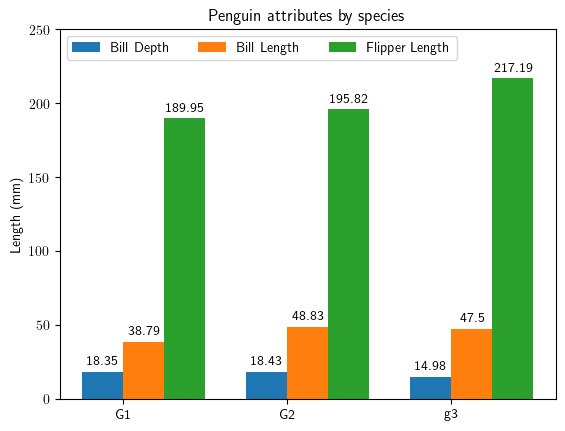

In [23]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(('G1', 'G2', 'g3'))



ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 250)

plt.show()